In [8]:
from location import Location
import pandas as pd
from visualize import Visualize
# install nbformat
import plotly.express as px
api_key = pd.read_csv("/Users/dani/Desktop/api_key.txt",header=None)[0][0]
major_path = "Data/GlobalLandTemperaturesByMajorCity.csv"
all_path = "Data/GlobalLandTemperaturesByCity.csv"
major = Location(major_path,api_key)
all = Location(all_path,api_key)
update = False
if update:
    major.update_file()
    all.update_file()

Google api can't find: Bally, Nigel, Sakura

In [41]:
# To do
# Statistics for each city (mean, median, mode, std, var, min, max) for each year (v)
# Scatter plot for each city (x = year, y = temperature) (v)
# Map with temperature range by year (v)
# Predict temperature (v)
# General statistics for each country (mean, median, mode, std, var, min, max) for each year (TODO)
# General scatter plot for each country (x = year, y = temperature) (TODO)
# General map with temperature range by year (v)
vis_all = Visualize(all.data)
vis_major = Visualize(major.data)

In [3]:
html = False
if html:
    bubble_major = vis_major.bubble(10)
    range_major = vis_major.bubble_range()
    bubble_all = vis_all.bubble(2)
    range_all = vis_all.bubble_range()
    heatmap_all = vis_all.heatmap()
    bubble_major.write_html("bubble_major.html")
    range_major.write_html("range_major.html")
    bubble_all.write_html("bubble_all.html")
    range_all.write_html("range_all.html")

/var/folders/rm/vr__kwkd7dz9z9mvt6z1hm2r0000gn/T/ipykernel_18114/2074401432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['dt'].dt.strftime('%B')
/var/folders/rm/vr__kwkd7dz9z9mvt6z1hm2r0000gn/T/ipykernel_18114/2074401432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Num'] = df['Month'].map({month: i for i, month in enumerate(df['Month'].unique())})
/Users/dani/.pyenv/versions/3.12.0/envs/project/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight 

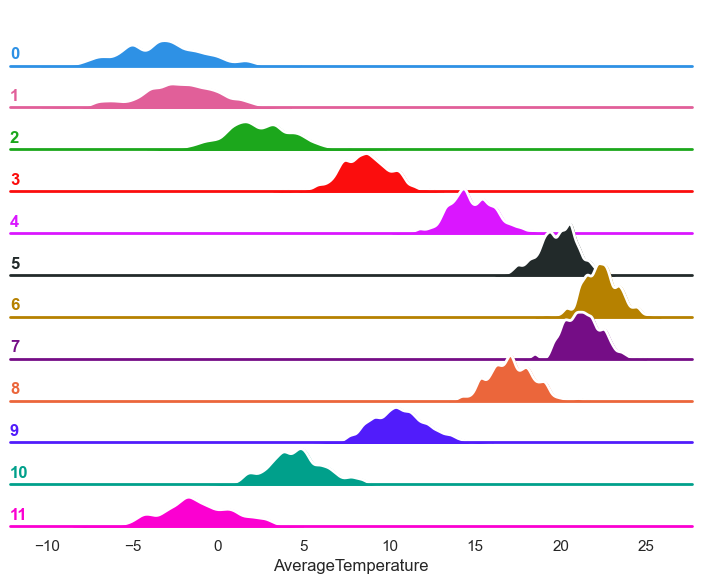

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
df = vis_major.data[vis_major.data['City'] == 'New York']
df['Month'] = df['dt'].dt.strftime('%B')
df['Month_Num'] = df['Month'].map({month: i for i, month in enumerate(df['Month'].unique())})
pal = px.colors.qualitative.Dark24
g = sns.FacetGrid(df, row="Month", hue="Month_Num", aspect=15, height=.5, palette=pal)
g.map(sns.kdeplot, "AverageTemperature",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "AverageTemperature", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "AverageTemperature")
g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [26]:
df = Visualize(major.data)
df.data_year["Range"] = df.data_year['MaxTemp'] - df.data_year['MinTemp']
df.data_year["Size"] =  df.data_year['Range']/10
min  = df.data_year['Range'].min()
max = df.data_year['Range'].max()
# Sort by 'Year' and 'Range'
df_sorted = df.data_year.sort_values(by=['Year', 'Range'], ascending=[True, False])

# Group by 'Year' and take the top 5 for each year
df_top5 = df_sorted.groupby('Year').head(1)

# Now you can create your bubble chart with df_top5
fig = px.scatter(df_top5, x="Year", y="Range", size="Range", color="Range",
                 title='Top 5 Ranges for Each Year')
fig.show()